In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pylab import *

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [4]:
#paramètres
M=2
T=10
dt=0.2
m=int(M/dt)
N_0=int(T/dt)
m, N_0

(10, 50)

In [5]:
#Grille de discretisation
t=np.arange(0,T+dt,dt)
x=np.arange(0,M+dt,dt)
SX,ST=np.meshgrid(x,t)
Omega_dt= np.tile(x,(N_0+1,1)) 
Omega_dt.shape, x.shape, t.shape, ST.shape, SX.shape

((51, 11), (11,), (51,), (51, 11), (51, 11))

In [6]:
t, x, t.shape, x.shape; Omega_dt[:,:].shape

(51, 11)

In [7]:
u_0=np.ones(len(x))
def g(t):
    return np.exp(-t)


In [8]:
#Initialisation
W_dt=np.zeros_like(Omega_dt)
P_dt=np.zeros(N_0+1)
dP_dt=P_dt/10
W_dt[0,:]=u_0
W_dt[1:,0]=g(t)[1:]
P_dt[0]=dt/2*(2*W_dt[0,:m]@np.ones_like(x[:m])-W_dt[0,0]-W_dt[0,m-1])
dP_dt[0]=P_dt[0]/10

In [9]:
#point a un antécédant partie 1
for i in np.arange(0,m):
    W_dt[1,i+1]=W_dt[0,i]-dt*dP_dt[0]*W_dt[0,i]    #Pour chaque point de la ligne 1 , colonne i, on a besion du point (0,i-1)
P_dt[1]=dt/2*(2*W_dt[1,:m-1]@np.ones_like(x[:m-1])-W_dt[1,0]-W_dt[1,m-2])
dP_dt[1]=P_dt[1]/10

In [10]:
#Algo principal
for n in np.arange(2,N_0+1):
    for i in np.arange(0,m-1):
        W_dt[n,i+2]=W_dt[n-2,i]-2*dt*dP_dt[n-1]*W_dt[n-1,i+1] #Pour chaque point de la ligne n, colonne i+2, on a besion des points (n-2,i) et (n-1,i+1) 
    W_dt[n:,1]=W_dt[n-1,0]-dt*dP_dt[n-1]*W_dt[n-1,0]                #Pour chaque point de la ligne n , colonne 1, on a besion du point (n-1,0)
    P_dt[n]=dt/2*(2*W_dt[n,:m-1]@np.ones_like(x[:m-1])-W_dt[n,0]-W_dt[n,m-2])
    dP_dt[n]=P_dt[n]/10

Text(0.5, 1.0, 'Poputation approchée en fonction du temps ')

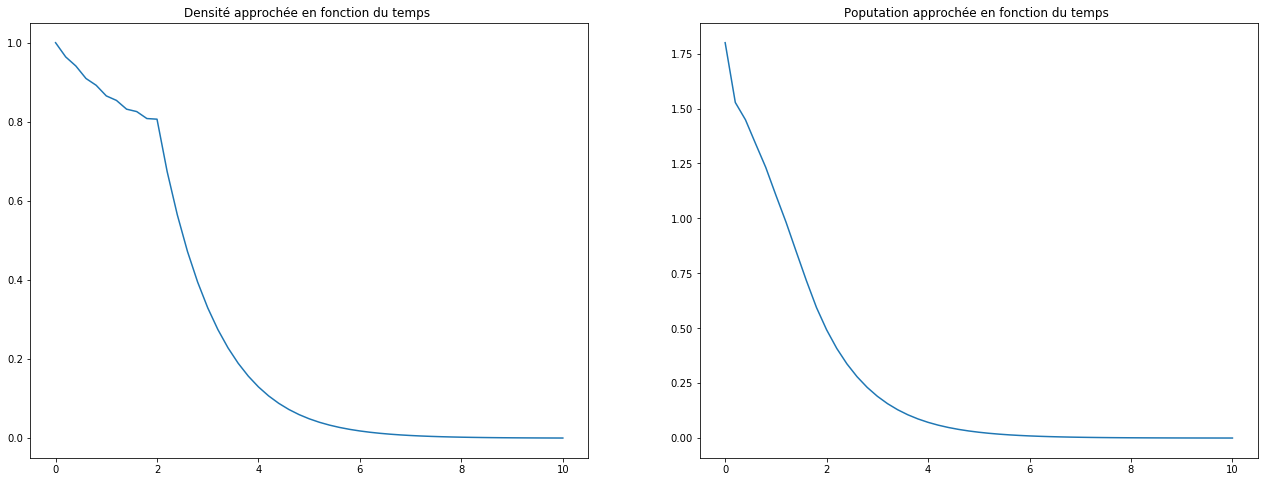

In [11]:
#Tracé
plt.figure(figsize= (22,8))


plt.subplot(121)
plt.plot(t, W_dt[:,-1])
plt.title("Densité approchée en fonction du temps ")


plt.subplot(122)
plt.plot(t, P_dt)
plt.title("Poputation approchée en fonction du temps ")

In [12]:
W_dt[:,0].shape, np.ones_like(x), P_dt, dP_dt, W_dt[:,:];

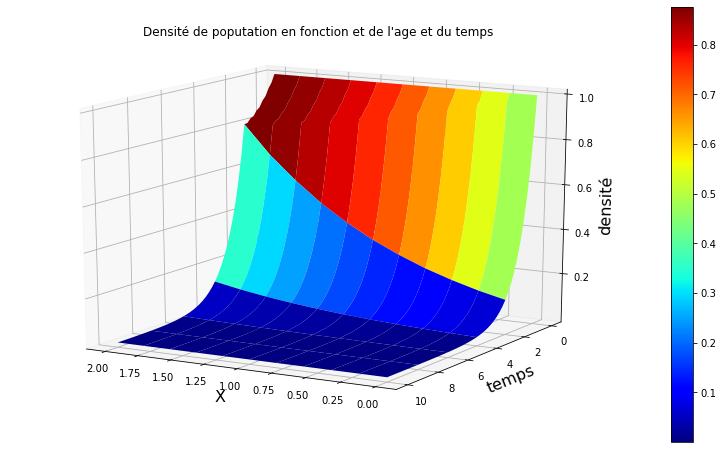

In [16]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('densité', fontsize = 16)
ax.set_title("Densité de poputation en fonction et de l'age et du temps ")
ax.view_init(elev=15, azim = 120)

norm = colors.Normalize(1.0,0.0)
p = ax.plot_surface(SX,ST,W_dt,cstride=1,linewidth=0,cmap='jet')
cb = fig.colorbar(p,ax = ax)

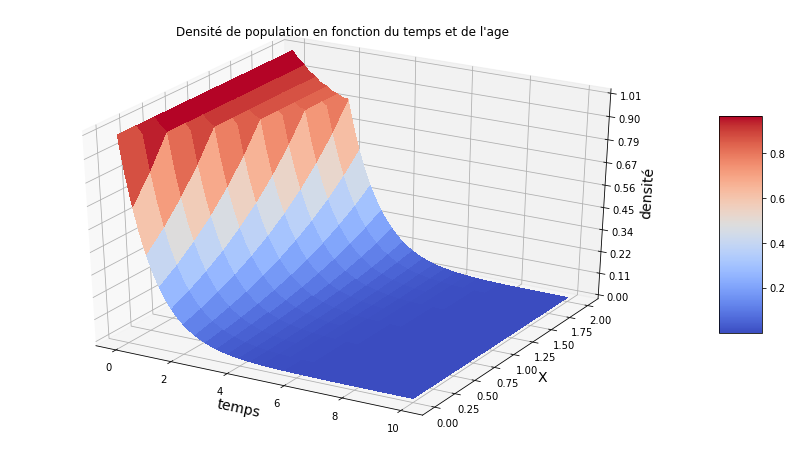

In [17]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(ST, SX, W_dt, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('temps', fontsize = 14)
ax.set_ylabel('X', fontsize = 14)
ax.set_zlabel('densité', fontsize = 14)
ax.set_title("Densité de population en fonction du temps et de l'age")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [18]:
#fonction densite
def densite_pop(M,dt,T,dp):
    #paramètres
    m=int(M/dt)
    N_0=int(T/dt)
    
    #Grille de discretisation
    temps=np.arange(0,T+dt,dt)
    age=np.arange(0,M+dt,dt)
    SX,ST=np.meshgrid(x,t)
    Grille_dt= np.tile(age,(N_0+1,1)) 
    
    #données initiales
    U_0=np.ones(len(age))
    def g(temps):
        return np.exp(-temps)
    
    #Initialisation
    U_dt=np.zeros_like(Grille_dt)
    Pop_dt=np.zeros(N_0+1)
    dPop_dt=Pop_dt/10
    U_dt[0,:]=U_0
    U_dt[1:,0]=g(temps)[1:]
    Pop_dt[0]=dt/2*(2*U_dt[0,:m]@np.ones_like(age[:m])-U_dt[0,0]-U_dt[0,m-1])
    dPop_dt[0]=Pop_dt[0]*dp
    
    #point a un antécédant partie 1
    for i in np.arange(0,m):
        U_dt[1,i+1]=U_dt[0,i]-dt*dPop_dt[0]*U_dt[0,i]    #Pour chaque point de la ligne 1 , colonne i, on a besion du point (0,i-1)
    Pop_dt[1]=dt/2*(2*U_dt[1,:m-1]@np.ones_like(age[:m-1])-U_dt[1,0]-U_dt[1,m-2])
    dPop_dt[1]=P_dt[1]*dp
    
    #Algo principal
    for n in np.arange(2,N_0+1):
        for i in np.arange(0,m-1):
            U_dt[n,i+2]=U_dt[n-2,i]-2*dt*dPop_dt[n-1]*U_dt[n-1,i+1] #Pour chaque point de la ligne n, colonne i+2, on a besion des points (n-2,i) et (n-1,i+1) 
        U_dt[n:,1]=U_dt[n-1,0]-dt*dPop_dt[n-1]*U_dt[n-1,0]                #Pour chaque point de la ligne n , colonne 1, on a besion du point (n-1,0)
        Pop_dt[n]=dt/2*(2*U_dt[n,:m-1]@np.ones_like(age[:m-1])-U_dt[n,0]-U_dt[n,m-2])
        dPop_dt[n]=Pop_dt[n]/10
    return U_dt, Pop_dt

In [19]:
#parametres
M=2
T=10
dt=0.1
dp=1./10

In [20]:
t2=np.arange(0,T+dt,dt)
x2=np.arange(0,M+dt,dt)
W_dt2,P_dt2=densite_pop(M,dt,T,dp)

In [21]:
dt=0.05
t3=np.arange(0,T+dt,dt)
x3=np.arange(0,M+dt,dt)
W_dt3,P_dt3=densite_pop(M,dt,T,dp)

In [22]:
dt=0.025
t4=np.arange(0,T+dt,dt)
x4=np.arange(0,M+dt,dt)
W_dt4,P_dt4=densite_pop(M,dt,T,dp)

In [23]:
dt=0.00625
t5=np.arange(0,T+dt,dt)
x5=np.arange(0,M+dt,dt)
W_dt5,P_dt5=densite_pop(M,dt,T,dp)

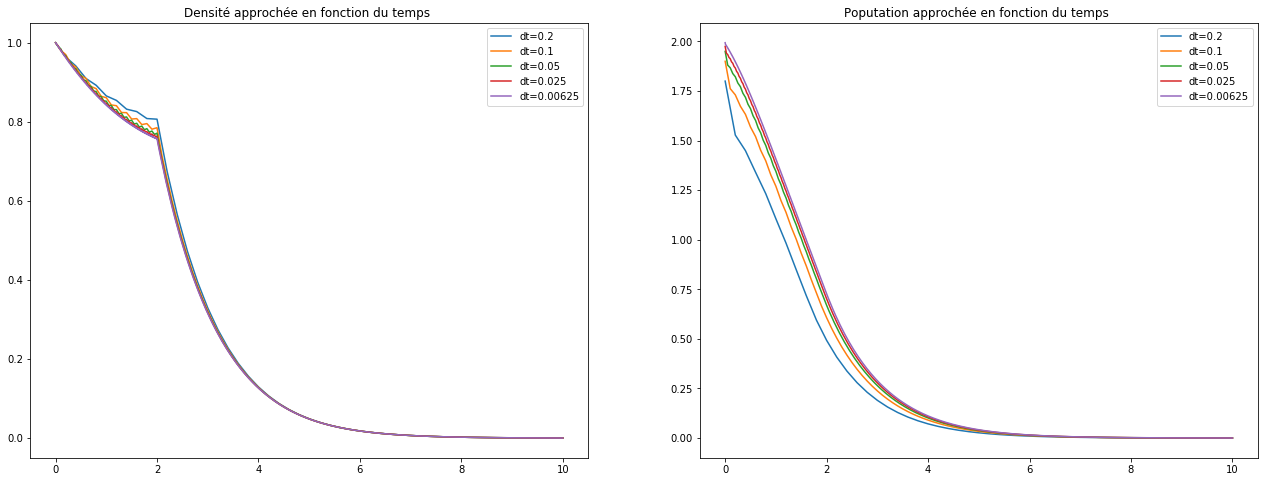

In [24]:
#Tracé
plt.figure(figsize= (22,8))


plt.subplot(121)
plt.plot(t, W_dt[:,-1], label="dt=0.2")
plt.plot(t2, W_dt2[:,-1], label="dt=0.1")
plt.plot(t3, W_dt3[:,-1], label="dt=0.05")
plt.plot(t4, W_dt4[:,-1], label="dt=0.025")
plt.plot(t5, W_dt5[:,-1], label="dt=0.00625")
plt.title("Densité approchée en fonction du temps ")
plt.legend()

plt.subplot(122)
plt.plot(t, P_dt, label="dt=0.2")
plt.plot(t2, P_dt2, label="dt=0.1")
plt.plot(t3, P_dt3, label="dt=0.05")
plt.plot(t4, P_dt4, label="dt=0.025")
plt.plot(t5, P_dt5, label="dt=0.00625")
plt.title("Poputation approchée en fonction du temps ")
plt.legend()